# Categorical Map

This example plot shows pollen health impact classes over the Alps on February 15, 2020 at 8 o'clock in the evening. It shows hourly values for Alder (Alnus) pollen and has been kindly provided by Simon Adamov. The field is generated by the COSMO-1E weather model, on the typical COSMO-1E domain over the greater alpine area. For better understanding, the numerical pollen concentrations are converted into health impact classes. These classes are then presented to the public via animated pollen maps in the MeteoSwiss App.

In [1]:
# Import packages
import iconarray
import numpy as np
import psyplot.project as psy

In [2]:
# show figures after they are drawn or updated
psy.rcParams['auto_show'] = True
%matplotlib inline
%config InlineBackend.close_figures = False

In [3]:
# Get example datasets for testing (won't do anything if data is already downloaded)
iconarray.get_example_data()

 
Getting data from folder: grib
 
Getting data from folder: grids
 
Getting data from folder: nc
 
Getting data from folder: pyvis


In [4]:
# Open dataset
ds = psy.open_dataset("../data/example_data/pyvis/cosmo_pollen.nc")

In [5]:
# Divide data into bins
ds["ALNU"].values = np.digitize(ds["ALNU"].values, bins=[1, 10, 70, 250])

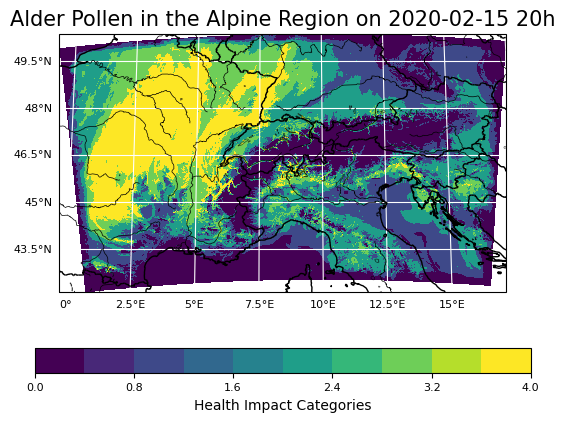

In [6]:
pollen_plot = ds.psy.plot.mapplot(
    name="ALNU",
    title="Alder Pollen in the Alpine Region on 2020-02-15 20h",
    titlesize=15,
    lakes=True,
    borders=True,
    rivers=True,
    grid_color="white",
    cticksize=8,
    clabel="Health Impact Categories",
    grid_labelsize=8,
    projection="robin",
    cmap="viridis")

/Users/alauber/opt/anaconda3/envs/psyplot/lib/python3.9/site-packages/psy_simple/plotters.py:1029: UserWarning: [cticklabels] - Length of ticks (6) and ticklabels (5)do not match!
  warn("[%s] - Length of ticks (%i) and ticklabels (%i)"


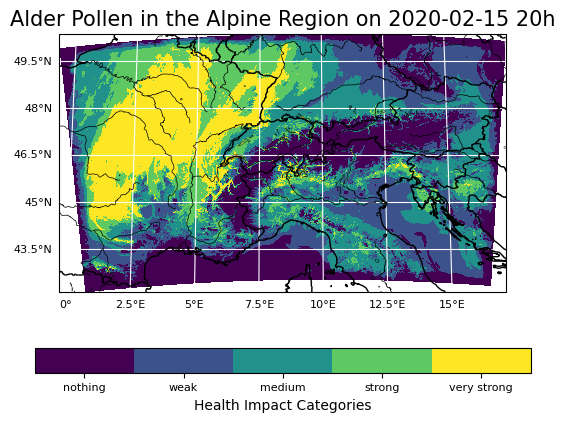

In [7]:
# Replace the colorbar ticks with the categories
colorbar_ticks = [0.5, 1.5, 2.5, 3.5, 4.5]
colorbar_bounds = list(range(0, 6, 1))
colorbar_tickslabel = ["nothing", "weak", "medium", "strong", "very strong"]
pollen_plot.update(bounds=colorbar_bounds, cticks=colorbar_ticks, cticklabels=colorbar_tickslabel)